# Projeto 2 - NLP

-----

 Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 2 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Dicas
     

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

-------

#### First, let's do the importing of the necessary libraries.

In [95]:
# Imports for Data Analysis
import pandas as pd
import numpy as np

# Imports for Data-viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud

# Imports for image processing
from skimage import feature

# Imports for NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from unidecode import unidecode
from nltk.stem.porter import *
from nltk import pos_tag

import string
from unidecode import unidecode
import emoji
import spacy
from spacy.lang.pt.examples import sentences 
import re

import tensorflow.keras as keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Imports for Cross-validation
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold


# Imports for Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer


# Imports for Deep Learning
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding

# Imports for Model Validation
import sklearn.metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from collections import Counter
from time import time

In [8]:
# Downloading the necessary packages
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("rslp")
pt_stopwords = nltk.corpus.stopwords.words("portuguese")
spacy.cli.download("pt_core_news_sm")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /usr/share/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflow<3,>=2.9.0, but you have tensorflow 2.6.4 which is incompatible.
pandas-profiling 3.1.0 requires mar

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [9]:
#Instantiates the PorterStemmer
stemmer = PorterStemmer()

### Analysis Set up

In [10]:
# Reading the training dataset 
df_complete = pd.read_csv("../input/train3classes/Train3Classes.csv")
df_complete

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)
...,...,...,...,...,...
94995,1041831666883321856,Cuba e defensor de direitos humanos se unem co...,Mon Sep 17 23:30:00 +0000 2018,2,jornaloglobo
94996,1032352892194369536,#Oportunidade ➡️ Venha fazer parte da nossa eq...,Wed Aug 22 19:44:44 +0000 2018,2,#oportunidade
94997,1046785538542440448,@96syoo EU SEI 😭😭 é por isso que significa mui...,Mon Oct 01 15:34:55 +0000 2018,0,:(
94998,1045457469110177792,@louistsexhes N te conheço mas posta :D,Thu Sep 27 23:37:38 +0000 2018,1,:)


In [11]:
# Checking the information of our dataset for training

print("Information of our dataset for training \n Total Rows | Total Columns | Total of Null Values | Type")
print(df_complete.info())

Information of our dataset for training 
 Total Rows | Total Columns | Total of Null Values | Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
None


In [12]:
# Checking the values of the queries used while searching subjects

df_complete["query_used"].value_counts()

:(               31696
:)               31678
folha             5004
estadao           3880
#fato             3471
g1                3439
exame             3417
#trabalho         3030
#oportunidade     2455
jornaloglobo      2374
veja              2141
#noticia          1114
#novidade          920
#curiosidade       381
Name: query_used, dtype: int64

In [13]:
# Checking value for each sentiment classification

df_complete["sentiment"].value_counts()

0    31696
1    31678
2    31626
Name: sentiment, dtype: int64

In [14]:
# Checking for missing values at the original dataset

print(f"Missing Data:", df_complete.isna().sum())

Missing Data: id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64


# Important Considerations Regarding This Database

#### After checking the information of the dataset as well as the business need for this project, the first decision was to exclude the unnecessary columns, focusing on the relevant data.

After analyzing the initial information, it’s possible to see that there are no null values in this dataset, the “*ID*” column is numerical as well as “*sentiment*”.

   Please mind that, if this was a case in which it was necessary to assess a unique user’s tweeting multiple times about a subject or even how many times a specific user contacted a brand via Twitter, this column would be necessary to measure the sentiment throughout the time. However, in this specific scenario, since the database is massive and a brand’s interaction with its user base is not being assessed at the moment, it will be rather difficult to check that specificity.
    
The same is valid for the column “tweet_date”, which would provide insights in case this dataset was measuring how many specific users had a negative sentiment towards a brand/product in a specific date, say that in that occasion some issue happened heavily affecting the general public.

Since the aforementioned is not true to the problem proposed in this project, hence the decision to eliminate both the “*ID*” and “*tweet_date*” column was made.

   On a further analysis, the class aimed for prediction is already balanced without the need to further tweak it. 
Furthermore, the column “*tweet_text*” not only has a bunch of emojis, online laughter such as “*kkkkkk*”, “*rsrsrsr*”, “*hahahah*” etc., and punctuation representing feelings, as the **sad smiley face** represented by the symbol “ :(“, it also has user mentions, hashtags and urls; which are all irrelevant to our analysis at this point.

As the column “*query_used*” represents the search made at *Twitter* to find the relevant *Tweets* belonging to this database, it’s possible to observe that whenever the sad emoji symbol appears both in the query and at the *tweet* itself, the sentiment is tagged negatively; the same is true for the happy face emoji.

   At first, it had been decided to create a dictionary and a function to handle this scenario, changing the smiley codes to their values, such as “happy”, “sad”, and “neutral”, starting the preprocessing and data cleaning. 
Nonetheless, upon further appraisal it became clear that this phenomenon is attributed to the way this database was assembled which would represent a terrible data leak into the model if this decision were to be kept.
**Thus, the column “query_used” will also be removed from our training data**.


In [15]:
# Creating a copy of the original dataframe
df_train = df_complete.copy()

# Creating an unprocessed dataset based on the complete version, removing the irrelevant columns.
df_train = df_complete[["tweet_text", "sentiment"]]
df_train

,tweet_text,sentiment
0,Rio elege maior bancada policial de sua histór...,2
1,fiquei tão triste quando eu vi o preço da câme...,0
2,"Para Theresa May, seu plano para o Brexit é a ...",2
3,caralho eu quero proteger a danielly em um pot...,0
4,@SiCaetano_ viva o caos :),1
...,...,...
94995,Cuba e defensor de direitos humanos se unem co...,2
94996,#Oportunidade ➡️ Venha fazer parte da nossa eq...,2
94997,@96syoo EU SEI 😭😭 é por isso que significa mui...,0
94998,@louistsexhes N te conheço mas posta :D,1


In [16]:
# Checking for duplicates
print("Duplicated information:", df_train.duplicated().sum())

Duplicated information: 815


In [17]:
# Removing the duplicated information
df_train.drop_duplicates(inplace = True)
df_train

,tweet_text,sentiment
0,Rio elege maior bancada policial de sua histór...,2
1,fiquei tão triste quando eu vi o preço da câme...,0
2,"Para Theresa May, seu plano para o Brexit é a ...",2
3,caralho eu quero proteger a danielly em um pot...,0
4,@SiCaetano_ viva o caos :),1
...,...,...
94995,Cuba e defensor de direitos humanos se unem co...,2
94996,#Oportunidade ➡️ Venha fazer parte da nossa eq...,2
94997,@96syoo EU SEI 😭😭 é por isso que significa mui...,0
94998,@louistsexhes N te conheço mas posta :D,1


#### Consideration after checking the tokenization
- Based on the tokenization above, it's possible to see that some of the emojis weren't identified properly and got split in the process; therefore, it's necessary to use the emoji library to treat it and remove those entirely, which could lead to a different sentiment classification in our model.

 - Excluir colunas "id" e "tweet_date"
 - Remover caracteres especias: @ (código Regex: "(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)")
 - Remover: o que começa com "http", Emojis que não expressam sentimentos (deixar somente os que expressam algum sentimento)
 - Remover dígitos?
 - Não mexer na letra (caixa baixa ou alta)
 - Remover acentos
 - Emojis: ver biblioteca de emojis pastristea nas primeiras aulas

# Auxiliary Functions 

#### In order to preprocess this dataset to treat and clean our data, it will be necessary to have a few auxiliary functions to speed-up the process.

In [18]:
class PreProcessing:
    
    '''
    This class contains a set of functions created to apply some preprocessing items into the data so it's possible to clean it up a bit.
    '''

        
    def remove_query(self, string):
        '''
        Removes the query used
        '''
        string = re.sub("#fato|#novidade|#noticia|#curiosidade|#oportunidade|#trabalho"," ", string)
        return string

    
    def remove_lexicalstress(self, string):
        '''
        Removes the lexical stress pattern as we're dealing with Brazilian grammar
        '''
        br_lexical = unidecode(string)
        return br_lexical
    
    def remove_username(self, string):
        '''
        Removes @ and the user names
        '''
        username = r"@[a-zA-Z0-9_.]+"
        remove_username = re.sub(username,"", string)
        return remove_username

    def remove_digits(self, string):
        '''
        Removes digits
        '''
        remove_digits = re.sub(r"\d*", "", string)
        return remove_digits
    
    
    def punctuation_remove(self, string):
        '''
        This removes punctuation marks of our string
        '''
        punctuation_remove = re.sub(r"[^\w\s]","", string)
        return punctuation_remove
    
    def remove_links (self, string):
        '''
        Removes links
        '''
        url = r"[a-zA-Z0-9]+://[a-zA-Z0-9.-_]+/[a-zA-Z0-9]+"
        remove_links = re.sub(url," ", string)
        return remove_links
    
    def remove_emoji (self, string):
        '''
        Removes the emojis
        '''
        tweet_emoji = emoji.replace_emoji(string, replace="").lower()
        return tweet_emoji


    def remove_special(self, string):
        '''
        This function removes special characters of a string
        '''
        remove_characters = re.sub(r"[^a-zA-Z ]"," ", string)
        return remove_characters


    def tokenization(self, string):
        '''
        This function applies the tokenization in the string
        '''
        words = word_tokenize(string)
        return words
    
    def removes_stopwords (self, string):
        '''
        This function removes brazilian portuguese stopwords
        '''    
        filtered_words = []
        for word in string:
            if not word in pt_stopwords:
                filtered_words.append(word)
        
        return filtered_words

    def stemming(self, string):
        '''
        This function applies the stemmer into our string.
        
        It was cordially provided by our colleague Erivan Oliveira and his group.
        Since we are both studying at the same institution and had the same assignment. 
        '''
        stemmer = RSLPStemmer()
        filtered_words = []
        for word in string:
            filtered_words.append(stemmer.stem(word))
        return filtered_words
    
    #def lemmatization (self, string):
        '''
        Applies lemmatization
        This step was created together with professor Cecília Flávia while ministering classes on the concept of NLP
        '''
        #filtered_words = " ".join(list)
        
        #nlp = spacy.load("pt_core_news_sm")
        #doc = nlp(filtered_words)
        #tokens = [token for token in doc]
        
        #filtered_words = [token.lemma_ for token in doc]
        
        #return filtered_words

    def lemmatization(self, string):
        '''
        This function applies the stemmer into our string.
        
        It was cordially provided by our colleague Erivan Oliveira and his group.
        Since we are both studying at the same institution and had the same assignment. 
        '''
        filtered_words = []
        for word in string:
            filtered_words.append(nlp(word)[0].lemma_)
        return filtered_words

    def pipeline(self, string, methods):
        
        preprocessing_steps = {
            "remove_query":self.remove_query,
            "remove_lexicalstress": self.remove_lexicalstress,
            "remove_username": self.remove_username,
            "remove_digits":self.remove_digits,
            "punctuation_remove":self.punctuation_remove,
            "remove_links":self.remove_links,
            "remove_emoji":self.remove_emoji,
            "remove_special":self.remove_special,
            "tokenization":self.tokenization,
            "removes_stopwords":self.removes_stopwords,
            "stemming":self.stemming,
            "lemmatization":self.lemmatization
        }
        
        for method in methods:
            string = preprocessing_steps[method](string)
        return string
    

In [19]:
def removal_words(x,dictionary):
    '''
    This function was created to assess the frequency of words for this dataset
    '''
    removal_by_frequency = []
    for i in x:
        if i in repetition_freq[repetition_freq>10].index:
            removal_by_frequency.append(i)
    return removal_by_frequency    

In [60]:
def clf_metrics(estimator, X_train, X_test, y_train, y_test):
    
    '''
    This function is used to assess the metrics of the given model.
    '''
    
    print("# ============================================")
    
    print("\nTraining Assessment Metrics:\n")
    
    y_pred_train = estimator.predict(X_train)
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,cmap="plasma")
    plt.show()
    
    print(classification_report(y_train, y_pred_train))
    
    print("# ============================================")

    print("\nTest Assessment Metrics:\n")

    y_pred_test = estimator.predict(X_test)
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,cmap="plasma")
    plt.show()

    print(classification_report(y_test, y_pred_test))

In [93]:
def neural_network_clf(estimator, X_train, X_test, y_train, y_test):
    '''
    This function is used to assess the classification metrics of the neural network model.
    '''
    
    print("# ============================================")
    
    print("\nTraining Assessment Metrics:\n")

    y_pred_train = estimator.predict(X_train)
    y_pred_train = np.argmax(y_pred_train) 


    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, cmap="plasma")
    plt.show()

    print(classification_report(y_train, y_pred_train))

    print("# ============================================")

    print("\nTest Assessment Metrics:\n")

    y_pred_test = estimator.predict(X_test)
    y_pred_test = np.argmax(y_pred_test, axis=1) 

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap="plasma")
    plt.show()

    print(classification_report(y_test, y_pred_test))


#### Since this dataset is gigantic, in order to first test the preprocessing function and cleaning of data, it's necessary to create a fraction of it.

In [21]:
# Creating a fraction of this dataset since it's too big and we first want to check if our code works.
df_trainsample = df_train.sample(frac=0.01, replace=False)

In [22]:
# Calling the class to set the pipeline in motion with the process needed to clean this dataset
nlp = spacy.load("pt_core_news_sm")
pt_stopwords = nltk.corpus.stopwords.words("portuguese")

preprocess = PreProcessing()
pipeline = [
    "remove_query",
    "remove_lexicalstress",
    "remove_username",
    "remove_digits",
    "punctuation_remove",
    "remove_links",
    "remove_emoji",
    "remove_special",
    "tokenization",
    "removes_stopwords",
    "stemming",
    "lemmatization"
]

In [23]:
%%time
# Preprocessing stage creating the columns for Processed Tweet and Joined Tweet after being processed and cleaned
df_trainsample["processed_tweet"] = df_trainsample["tweet_text"].apply(preprocess.pipeline, methods = pipeline)

df_trainsample

CPU times: user 44.2 s, sys: 50 ms, total: 44.2 s
Wall time: 44.4 s


,tweet_text,sentiment,processed_tweet
19288,@VivienVillones Depende :),1,[depend]
29349,Vendedora - Loja de Brinquedos e Presentes - S...,2,"[vend, loj, brinqued, pr, Sao, Paul, sp, https..."
60313,Hoje vou voltar á natação :)),1,"[hoj, ir, volt, Nataca]"
90821,Fds espero que isto passe pq n quero faltar a ...,1,"[fd, esper, passr, pqr, n, querer, falt, trein..."
42564,"@duze_rick Jamal, você pode tentar o aumento d...",1,"[Jamal, voc, pod, Tent, aument, Limit, aplic, ..."
...,...,...,...
26578,"@S18NU To emocionado, a. Seu lindo. :(",0,"[to, Emocion, lind]"
60029,@marcao97fm @co1_gregory @estadio97 @domenico9...,2,"[mesmo, mesmov, ver, ir, enta, katzoporr, fat,..."
3482,"""Lembra quando você era criança, e você sonhav...",2,"[lembr, voc, crianc, voc, sonh, don, Mund, cri..."
59000,queria ser compreendida pelo menos uma vez na ...,0,"[querer, Compreend, menos, vez, vid]"


#### Now that the preprocessing was tested and worked according to what was expected, it's time to apply this into the training dataset.

In [24]:
%%time
# Preprocessing stage creating the columns for Processed Tweet and Joined Tweet after being processed and cleaned
df_train["processed_tweet"] = df_train["tweet_text"].apply(preprocess.pipeline, methods = pipeline)
df_train

CPU times: user 1h 11min 30s, sys: 4.65 s, total: 1h 11min 35s
Wall time: 1h 11min 56s


,tweet_text,sentiment,processed_tweet
0,Rio elege maior bancada policial de sua histór...,2,"[Rio, eleg, mai, banc, polic, hist, Httpstcosg..."
1,fiquei tão triste quando eu vi o preço da câme...,0,"[fiq, tao, trist, ver, prec, car]"
2,"Para Theresa May, seu plano para o Brexit é a ...",2,"[ther, may, plan, brexit, unic, opca, httpstco..."
3,caralho eu quero proteger a danielly em um pot...,0,"[caralh, querer, proteg, danielly, pot, tadir]"
4,@SiCaetano_ viva o caos :),1,"[viv, Cao]"
...,...,...,...
94995,Cuba e defensor de direitos humanos se unem co...,2,"[cub, defen, direit, human, un, contr, chefr, ..."
94996,#Oportunidade ➡️ Venha fazer parte da nossa eq...,2,"[oportunr, venh, fazer, part, equip, vag, Aber..."
94997,@96syoo EU SEI 😭😭 é por isso que significa mui...,0,"[saber, signif, to, feliz, demal, amo, aqu, pr..."
94998,@louistsexhes N te conheço mas posta :D,1,"[n, conhec, postr, d]"


In [25]:
%%time
# After preprocessing, joining the words again in a single string
df_train["clean_text"] = df_train["processed_tweet"].apply(lambda x: " ".join(x))
df_train

CPU times: user 62.3 ms, sys: 4 ms, total: 66.3 ms
Wall time: 65.4 ms


,tweet_text,sentiment,processed_tweet,clean_text
0,Rio elege maior bancada policial de sua histór...,2,"[Rio, eleg, mai, banc, polic, hist, Httpstcosg...",Rio eleg mai banc polic hist Httpstcosgxnhzkrh...
1,fiquei tão triste quando eu vi o preço da câme...,0,"[fiq, tao, trist, ver, prec, car]",fiq tao trist ver prec car
2,"Para Theresa May, seu plano para o Brexit é a ...",2,"[ther, may, plan, brexit, unic, opca, httpstco...",ther may plan brexit unic opca httpstcoeplydbj
3,caralho eu quero proteger a danielly em um pot...,0,"[caralh, querer, proteg, danielly, pot, tadir]",caralh querer proteg danielly pot tadir
4,@SiCaetano_ viva o caos :),1,"[viv, Cao]",viv Cao
...,...,...,...,...
94995,Cuba e defensor de direitos humanos se unem co...,2,"[cub, defen, direit, human, un, contr, chefr, ...",cub defen direit human un contr chefr oea inte...
94996,#Oportunidade ➡️ Venha fazer parte da nossa eq...,2,"[oportunr, venh, fazer, part, equip, vag, Aber...",oportunr venh fazer part equip vag Abert alunr...
94997,@96syoo EU SEI 😭😭 é por isso que significa mui...,0,"[saber, signif, to, feliz, demal, amo, aqu, pr...",saber signif to feliz demal amo aqu pra ver de...
94998,@louistsexhes N te conheço mas posta :D,1,"[n, conhec, postr, d]",n conhec postr d


In [26]:
# Checking the repetition of words throught the dataset
processed_words = pd.DataFrame(np.concatenate(df_train["processed_tweet"].values), columns = ["Appearance_Dataset"])
repetition_freq = processed_words.groupby("Appearance_Dataset").size().sort_values()
repetition_freq

Appearance_Dataset
Aaaaaaaaaaaaaaaaaaaaaaaaaa        1
httpstcopnhioqkgr                 1
httpstcopnhdpka                   1
httpstcopngvakxmlp                1
httpstcopngqatldc                 1
                              ...  
querer                         5871
bom                            6305
pra                            7254
ir                             9440
nao                           17974
Length: 87062, dtype: int64

In [27]:
# After the dataset has been preprocessed, there's still some tuning to be done. This will remove the less frequent appearances.

df_train["tweet_by_frequency"] = df_train["processed_tweet"].apply(lambda x: removal_words(x,repetition_freq))
df_train.head(20)

,tweet_text,sentiment,processed_tweet,clean_text,tweet_by_frequency
0,Rio elege maior bancada policial de sua histór...,2,"[Rio, eleg, mai, banc, polic, hist, Httpstcosg...",Rio eleg mai banc polic hist Httpstcosgxnhzkrh...,"[Rio, eleg, mai, banc, polic, hist]"
1,fiquei tão triste quando eu vi o preço da câme...,0,"[fiq, tao, trist, ver, prec, car]",fiq tao trist ver prec car,"[fiq, tao, trist, ver, prec, car]"
2,"Para Theresa May, seu plano para o Brexit é a ...",2,"[ther, may, plan, brexit, unic, opca, httpstco...",ther may plan brexit unic opca httpstcoeplydbj,"[ther, may, plan, brexit, unic, opca]"
3,caralho eu quero proteger a danielly em um pot...,0,"[caralh, querer, proteg, danielly, pot, tadir]",caralh querer proteg danielly pot tadir,"[caralh, querer, proteg, pot]"
4,@SiCaetano_ viva o caos :),1,"[viv, Cao]",viv Cao,"[viv, Cao]"
5,@ppolkiss Parabéns moço :D,1,"[parab, moc, d]",parab moc d,"[parab, moc, d]"
6,Trago verdades #fato https://t.co/DsbkrJgFVj,2,"[trag, verdad, httpstcodsbkrjgfvj]",trag verdad httpstcodsbkrjgfvj,"[trag, verdad]"
7,"A coleção aumentou, mas o espaço do quaro ""dim...",1,"[colecar, aument, espacr, quar, diminur, invia...",colecar aument espacr quar diminur inviabiliz ...,"[colecar, aument, espacr, diminur, nov, fot, d]"
8,@abreujaviera Amigaa :(,0,[amigo],amigo,[amigo]
9,fiquei exatos 45 minutos tentando conectar meu...,1,"[fiq, exat, minut, Tent, conect, tecl, Comput]",fiq exat minut Tent conect tecl Comput,"[fiq, exat, minut, Tent, conect, tecl, Comput]"


In [28]:
# Transforming the data after the last cleaning process
df_train["processed_v2"] = df_train["tweet_by_frequency"].apply(lambda x: " ".join(x))
df_train.head(20)

,tweet_text,sentiment,processed_tweet,clean_text,tweet_by_frequency,processed_v2
0,Rio elege maior bancada policial de sua histór...,2,"[Rio, eleg, mai, banc, polic, hist, Httpstcosg...",Rio eleg mai banc polic hist Httpstcosgxnhzkrh...,"[Rio, eleg, mai, banc, polic, hist]",Rio eleg mai banc polic hist
1,fiquei tão triste quando eu vi o preço da câme...,0,"[fiq, tao, trist, ver, prec, car]",fiq tao trist ver prec car,"[fiq, tao, trist, ver, prec, car]",fiq tao trist ver prec car
2,"Para Theresa May, seu plano para o Brexit é a ...",2,"[ther, may, plan, brexit, unic, opca, httpstco...",ther may plan brexit unic opca httpstcoeplydbj,"[ther, may, plan, brexit, unic, opca]",ther may plan brexit unic opca
3,caralho eu quero proteger a danielly em um pot...,0,"[caralh, querer, proteg, danielly, pot, tadir]",caralh querer proteg danielly pot tadir,"[caralh, querer, proteg, pot]",caralh querer proteg pot
4,@SiCaetano_ viva o caos :),1,"[viv, Cao]",viv Cao,"[viv, Cao]",viv Cao
5,@ppolkiss Parabéns moço :D,1,"[parab, moc, d]",parab moc d,"[parab, moc, d]",parab moc d
6,Trago verdades #fato https://t.co/DsbkrJgFVj,2,"[trag, verdad, httpstcodsbkrjgfvj]",trag verdad httpstcodsbkrjgfvj,"[trag, verdad]",trag verdad
7,"A coleção aumentou, mas o espaço do quaro ""dim...",1,"[colecar, aument, espacr, quar, diminur, invia...",colecar aument espacr quar diminur inviabiliz ...,"[colecar, aument, espacr, diminur, nov, fot, d]",colecar aument espacr diminur nov fot d
8,@abreujaviera Amigaa :(,0,[amigo],amigo,[amigo],amigo
9,fiquei exatos 45 minutos tentando conectar meu...,1,"[fiq, exat, minut, Tent, conect, tecl, Comput]",fiq exat minut Tent conect tecl Comput,"[fiq, exat, minut, Tent, conect, tecl, Comput]",fiq exat minut Tent conect tecl Comput


In [96]:
all_words = df_train["processed_v2"]

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Common words in a Processed Tweet")
plt.show()

TypeError: expected string or bytes-like object

In [29]:
# Creating a copy of the original dataframe
df_train_copy = df_train.copy()

# Creating an unprocessed dataset based on the complete version, removing the irrelevant columns.
df_train_copy = df_train[["processed_v2", "sentiment"]]
df_train_copy

,processed_v2,sentiment
0,Rio eleg mai banc polic hist,2
1,fiq tao trist ver prec car,0
2,ther may plan brexit unic opca,2
3,caralh querer proteg pot,0
4,viv Cao,1
...,...,...
94995,cub defen direit human un contr chefr oea inte...,2
94996,oportunr venh fazer part equip vag Abert alunr...,2
94997,saber signif to feliz demal amo aqu pra ver de...,0
94998,n conhec postr d,1


### Now that we've sufficiently cleaned our dataset, preprocessing it with the steps aforementioned, one of the other requirements of this project was to focus at the transformation stage, using different techniques such as Bag Of Words and TF-IDF.
Therefore, we will now implement it:

In [66]:
# Separating data into X and Y
X = df_train["processed_v2"]
y = df_train["sentiment"]

# Separating data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 42)

# Instantiates the transformer
tfidf = TfidfVectorizer(use_idf = True)

# Transform data into the output matrix
X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()

### Multinomial Naive Bayes

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


# ============================================

Training Assessment Metrics:



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


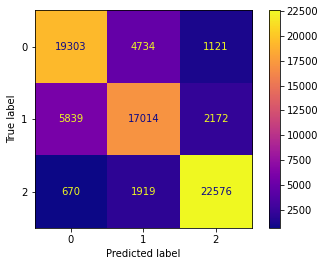

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     25158
           1       0.72      0.68      0.70     25025
           2       0.87      0.90      0.88     25165

    accuracy                           0.78     75348
   macro avg       0.78      0.78      0.78     75348
weighted avg       0.78      0.78      0.78     75348

# ============================================

Test Assessment Metrics:



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


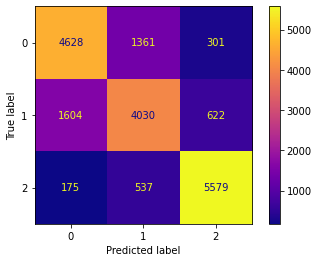

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      6290
           1       0.68      0.64      0.66      6256
           2       0.86      0.89      0.87      6291

    accuracy                           0.76     18837
   macro avg       0.75      0.76      0.75     18837
weighted avg       0.75      0.76      0.75     18837



In [67]:
# Instantiating the model
multinomial_model = MultinomialNB()

# Training the model
multinomial_model.fit(X_train_tfidf, y_train)

# Assesing the model
clf_metrics(multinomial_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

## Neural Network Model

#### In this section, a neural network model will be used. The steps seen were all taught during module ministered by professor Cecília Flávia, as well as the configurations necessary to implement it.

In [81]:
# Separating data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_train["processed_v2"],
                                                    df_train["sentiment"],
                                                    test_size=0.2,
                                                    stratify = y,
                                                    random_state=42)

In [84]:
# Separating data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [85]:
# Establishing boundries
vocab_size = 20000
embedding_dim = 16 # which is the size of each embedding vector
max_length = 250

In [86]:
# Using the Tokenizer
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [87]:
# Adjusting data
padded = pad_sequences(sequences,maxlen=max_length)
val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences,maxlen=max_length)
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences,maxlen=max_length)

**Some observations about the next step, which is the instantiation of the model.**

-  *Relu* (Rectified Linear Unit) activation function in Keras is going to be used, because it returns 0 if it receives any negative input, but for any positive value x it returns that value back.

**While**

- *Softmax* is going to be used because it transforms an unconstrained n-dimensional vector into a valid probability distribution.

In [88]:
# Instantiating the model
neural_model = Sequential()
neural_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
neural_model.add(Flatten())
neural_model.add(Dense(50, activation = "relu"))
neural_model.add(Dense(10))
neural_model.add(Dense(3))
neural_model.add(Activation("softmax"))

#### In the setup of the learning metrics, the optimizer "*Adam*" will be used.
- *Adam* optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In this case, the only difference to what was implemented during Cecília's lessons is the fact that Sparse Categorical Corssentropy is going to be used because the data has two or more label classes, provided as integers.

In [89]:
# Learning metrics
neural_model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [90]:
# Training the model
callbacks = [
    ModelCheckpoint(
        neural_model.save(filepath="1stmodel.keras"),
        save_best_only=True,
        monitor="val_loss"
    )
]

results = neural_model.fit(
 padded, y_train,
 epochs= 5,
 batch_size = 64,
 validation_data = (val_padded, y_val)
)

Epoch 1/5
1060/1060 [==============================] - 4s 3ms/step - loss: 0.5872 - accuracy: 0.3422 - val_loss: 0.4977 - val_accuracy: 0.4397
Epoch 2/5
1060/1060 [==============================] - 3s 3ms/step - loss: 0.4249 - accuracy: 0.3511 - val_loss: 0.4822 - val_accuracy: 0.2909
Epoch 3/5
1060/1060 [==============================] - 3s 3ms/step - loss: 0.3811 - accuracy: 0.3492 - val_loss: 0.4920 - val_accuracy: 0.3866
Epoch 4/5
1060/1060 [==============================] - 3s 3ms/step - loss: 0.3462 - accuracy: 0.3503 - val_loss: 0.5062 - val_accuracy: 0.3497
Epoch 5/5
1060/1060 [==============================] - 3s 3ms/step - loss: 0.3149 - accuracy: 0.3483 - val_loss: 0.5612 - val_accuracy: 0.3854


In [91]:
# Loading the best model generated
neural_model = load_model("1stmodel.keras")

# Applying test data into the model to check how it goes
test_loss, test_accuracy = neural_model.evaluate(test_padded,y_test)
print(f"Test accuracy for this model: {test_accuracy:.2f}")

589/589 [==============================] - 1s 2ms/step - loss: 1.0992 - accuracy: 0.8784
Test accuracy for this model: 0.88


In [94]:
# Assesing the model
neural_network_clf(neural_model, X_train, X_test, y_train, y_test)

# ============================================

Training Assessment Metrics:



ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 4000 but received input with shape (None, 16)


# Final Findings & Considerations

This project aimed to develop a model to detect sentiment in a Tweet. In general, the models used presented a good performance. 
Different Natural Language Processing techniques were implemented to clean the text, handle specific cases and test out some of the acquired knowledge through the course, such as Bag of Words with TF-IDF.
The models chosen for this sentiment analysis prediction were Multinomial NB as well as Neural Networks.
Note that even though the Multinomial NB presented an accuracy of 78%, while the Neural Network technique implemented has 88% of accuracy, and despite those percentages indicating that it's possible to analyze the sentiment of a Tweet based on the data provided, it's necessary to have an alignment with business to understand the context in which these models should be applied.
There was an effort to clean the leaked data inherent to this dataset; thus, the importance of understanding in which context this should be applied since a young user mentioning one’s dissatisfaction with a daily life occurrence, will not chose the same words/phrase patterns of a more mature user expressing dissatisfaction with a brand/service/product.

Brazilian Portuguese is very complex and rich in terms of slangs, phrase patterns and communication in general; therefore, it’s of extreme importance to choose well the cleaning and preprocessing stages to fine tune it to the desired audience.